<a href="https://colab.research.google.com/github/estefanabermeo/RegresionLineal/blob/main/A6_1_Mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACTIVIDAD 6.1 REGRESIÓN LINEAL SIMPLE DF MÉXICO**
#### Estefana Bermeo Severiano
#### A01367558

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [293]:
#Carga desde un archivo .csv
mex= pd.read_csv("mexico_limpio.csv")
mex.head(5)

<ipython-input-293-b238c5d07c0b>:2: DtypeWarning: Columns (0,2,8,24,62) have mixed types. Specify dtype option on import or set low_memory=False.
  mex= pd.read_csv("mexico_limpio.csv")


,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neiborhood_overview.1,host_response_rate
0,2056638,https://www.airbnb.com/rooms/2056638,2.02E+13,30/03/23,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,...,4.95,5.00,4.86,3.0,3.0,0.0,0.0,0.19,--,1.0
1,2072354,https://www.airbnb.com/rooms/2072354,2.02E+13,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,...,5.00,4.95,4.84,2.0,2.0,0.0,0.0,0.54,"Located in Coyoacan, in a quiet neighborhood w...",0.0
2,696037,https://www.airbnb.com/rooms/696037,2.02E+13,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,...,4.92,4.58,4.71,3.0,3.0,0.0,0.0,0.31,"This area is called Nuevo Polanco, it has bein...",1.0
3,35797,https://www.airbnb.com/rooms/35797,2.02E+13,29/03/23,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,...,0.00,0.00,0.00,1.0,1.0,0.0,0.0,0.00,"Centro comercial Santa Fe, parque interlomas y...",0.0
4,44616,https://www.airbnb.com/rooms/44616,2.02E+13,30/03/23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,...,4.78,4.98,4.48,12.0,3.0,2.0,0.0,0.46,--,1.0


# **Primer tipo de habitación = Private room**

In [294]:
filtro1_mex = mex.loc[mex['room_type'] == "Private room"]
filtro1_mex

,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neiborhood_overview.1,host_response_rate
7,61792,https://www.airbnb.com/rooms/61792,2.02E+13,30/03/23,city scrape,Spacious Clean Quiet room (own bath) in Condesa,"Located in La Condesa, one of the best neighbo...",https://a0.muscache.com/pictures/4c674e38-42f8...,299558,https://www.airbnb.com/users/show/299558,...,4.95,4.94,4.87,2.0,0.0,2.0,0.0,0.94,You are going to be in one of the nicest neigh...,1.0
16,760912,https://www.airbnb.com/rooms/760912,2.02E+13,30/03/23,city scrape,"Stylish bachelor pad in La Roma, DF",<b>The space</b><br />If you are coming to Mex...,https://a0.muscache.com/pictures/10580755/b2dc...,3817743,https://www.airbnb.com/users/show/3817743,...,4.60,4.80,4.60,1.0,0.0,1.0,0.0,0.04,--,0.0
17,2088218,https://www.airbnb.com/rooms/2088218,2.02E+13,30/03/23,city scrape,Private rooms near old Coyoacan center,Hello! I have 2 private rooms for rent in a ni...,https://a0.muscache.com/pictures/32395878/54f6...,10659485,https://www.airbnb.com/users/show/10659485,...,4.80,4.40,4.40,1.0,0.0,1.0,0.0,0.04,"Es una zona residencial de Coyoacán, ubicada e...",0.0
18,2093036,https://www.airbnb.com/rooms/2093036,2.02E+13,29/03/23,city scrape,Departamento 2 dormitorios x Antara,Departamento de 2 dormitorios y 1 banos comple...,https://a0.muscache.com/pictures/28553895/71d5...,3083561,https://www.airbnb.com/users/show/3083561,...,0.00,0.00,0.00,1.0,0.0,1.0,0.0,0.00,El apartamento se encuentra en una zona reside...,0.0
21,131610,https://www.airbnb.com/rooms/131610,2.02E+13,29/03/23,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,https://a0.muscache.com/pictures/837085/b9ed71...,647454,https://www.airbnb.com/users/show/647454,...,0.00,0.00,0.00,3.0,1.0,2.0,0.0,0.00,--,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24201,856000000000000000.0,https://www.airbnb.com/rooms/856473895554110501,20200000000000.0,30/03/23,city scrape,506,""" THE BRIT "" es un edificio único en su clase ...",https://a0.muscache.com/pictures/miso/Hosting-...,505303275,https://www.airbnb.com/users/show/505303275,...,0.00,0.00,0.00,6.0,1.0,5.0,0.0,0.00,--,0.0
24214,854000000000000000.0,https://www.airbnb.com/rooms/853707681690048732,20200000000000.0,30/03/23,city scrape,Beautiful Sunny bedroom off Masaryk,This cozy and sunny bedroom is the perfect pla...,https://a0.muscache.com/pictures/miso/Hosting-...,506768013,https://www.airbnb.com/users/show/506768013,...,0.00,0.00,0.00,1.0,0.0,1.0,0.0,0.00,Polanco one of the safest and best neighborhoo...,1.0
24216,854000000000000000.0,https://www.airbnb.com/rooms/853746847434924262,20200000000000.0,29/03/23,city scrape,Room with great view & BR 1 block from Reforma,Private room in Penthouse located in the heart...,https://a0.muscache.com/pictures/miso/Hosting-...,68325043,https://www.airbnb.com/users/show/68325043,...,0.00,0.00,0.00,1.0,0.0,1.0,0.0,0.00,Many restaurant option as well as cafes and ba...,1.0
24219,854000000000000000.0,https://www.airbnb.com/rooms/853922041242738127,20200000000000.0,29/03/23,city scrape,"Excelente Ambiente 5570,835,621",Tu familia estará cerca de todo si te hospedas...,https://a0.muscache.com/pictures/d2e3ac33-c092...,506810572,https://www.airbnb.com/users/show/506810572,...,0.00,0.00,0.00,2.0,0.0,2.0,0.0,0.00,--,1.0


## **Regresión 1**

X = host_response_rate

y= host_acceptance_rate

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

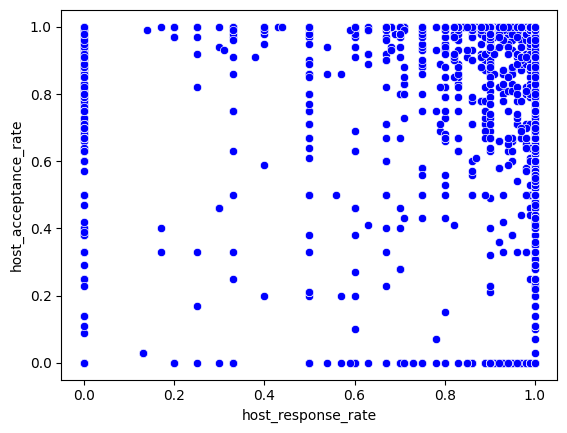

In [295]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1_mex)

In [296]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1_mex[['host_response_rate']]
Var_Dep= filtro1_mex['host_acceptance_rate']

In [297]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [298]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [299]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [300]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.30361209]),
 'rank_': 1,
 'singular_': array([35.02268297]),
 'intercept_': 0.5339403072822166}

**Modelo matemático: y= 0.30361209x + 0.5339403072822166**

---

In [301]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.10242991819597624

In [302]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.320046743767182

## **Regresión 2**

X = price

y= host_acceptance_rate

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

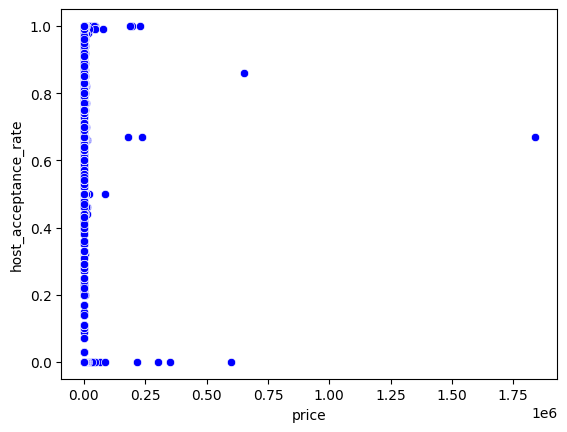

In [303]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=filtro1_mex)

In [304]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep2= filtro1_mex[['price']]
Var_Dep2= filtro1_mex['host_acceptance_rate']

In [305]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model2= LinearRegression()

In [306]:
#Verificamos la función relacionada al modelo
type(model2)

sklearn.linear_model._base.LinearRegression

In [307]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [308]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-3.49814314e-07]),
 'rank_': 1,
 'singular_': array([2160830.41606824]),
 'intercept_': 0.7731305870565954}

**Modelo matemático: y= -3.49814314e-07x + 0.7731305870565954**

---

In [309]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter2

0.0005176144732649268

In [310]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.022751142240883794

## **Regresión 3**

X = number_of_reviews

y= host_acceptance_rate

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

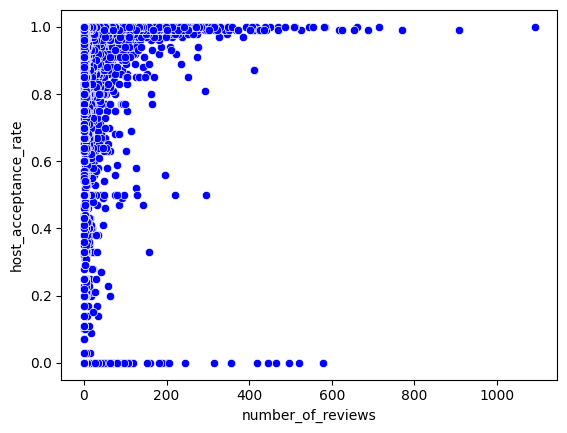

In [311]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro1_mex)

In [312]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep3= filtro1_mex[['number_of_reviews']]
Var_Dep3= filtro1_mex['host_acceptance_rate']

In [313]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

In [314]:
#Verificamos la función relacionada al modelo
type(model3)

sklearn.linear_model._base.LinearRegression

In [315]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Vars_Indep3, y=Var_Dep3)

LinearRegression()

In [316]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00102198]),
 'rank_': 1,
 'singular_': array([5203.65954966]),
 'intercept_': 0.7461541467021322}

**Modelo matemático: y=0.00102198x + 0.7461541467021322**


---

In [317]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Deter3

0.025621035420213434

In [318]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

0.1600657221900224

## **Regresión 4**

X = review_scores_cleanliness

y= review_scores_location

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

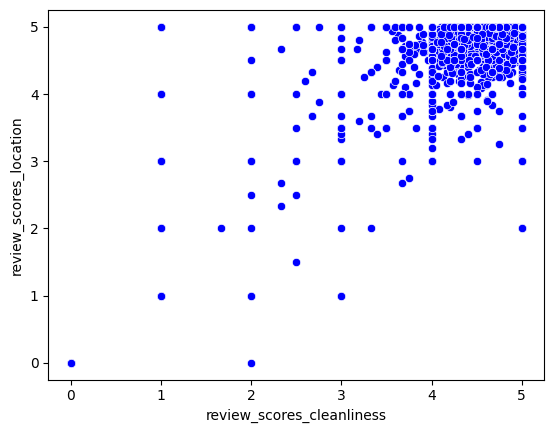

In [319]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=filtro1_mex)

In [320]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep4= filtro1_mex[['review_scores_cleanliness']]
Var_Dep4= filtro1_mex['review_scores_location']

In [321]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model4= LinearRegression()

In [322]:
#Verificamos la función relacionada al modelo
type(model4)

sklearn.linear_model._base.LinearRegression

In [323]:
#Ajustamos el modelo con las variables antes declaradas
model4.fit(X=Vars_Indep4, y=Var_Dep4)

LinearRegression()

In [324]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.00037091]),
 'rank_': 1,
 'singular_': array([181.95203241]),
 'intercept_': 0.07951183473700185}

**Modelo matemático: y=1.00037091x + 0.07951183473700185**


---

In [325]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model4.score(X=Vars_Indep4, y=Var_Dep4)
coef_Deter4

0.972350250942289

In [326]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.986078217456551

## **Regresión 5**

X = number_of_reviews

y= availability_365

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

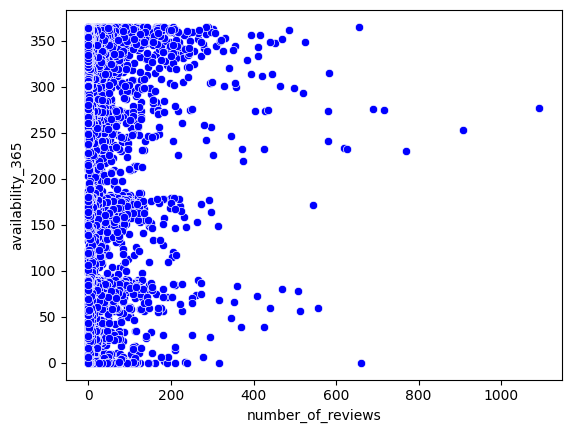

In [327]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=filtro1_mex)

In [328]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep5= filtro1_mex[['number_of_reviews']]
Var_Dep5= filtro1_mex['availability_365']

In [329]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model5= LinearRegression()

In [330]:
#Verificamos la función relacionada al modelo
type(model5)

sklearn.linear_model._base.LinearRegression

In [331]:
#Ajustamos el modelo con las variables antes declaradas
model5.fit(X=Vars_Indep5, y=Var_Dep5)

LinearRegression()

In [332]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.09364539]),
 'rank_': 1,
 'singular_': array([5203.65954966]),
 'intercept_': 255.47449731231168}

**Modelo matemático: y= -0.09364539x + 255.47449731231168**


---

In [333]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model5.score(X=Vars_Indep5, y=Var_Dep5)
coef_Deter5

0.001848740094272383

In [334]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

0.04299697773416619

## **Regresión 6**

X = review_scores_communication

y= reviews_per_month

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

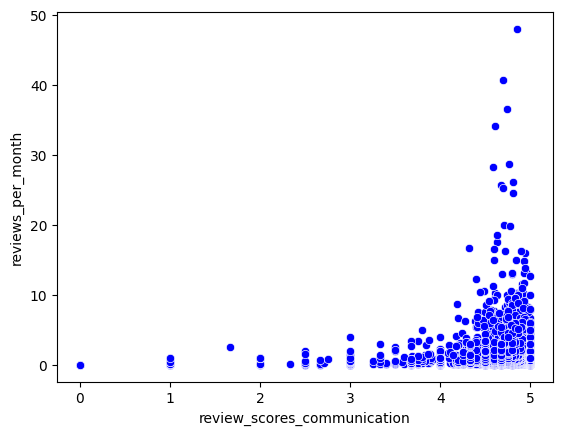

In [335]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=filtro1_mex)

In [336]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep6= filtro1_mex[['reviews_per_month']]
Var_Dep6= filtro1_mex['review_scores_communication']

In [337]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model6= LinearRegression()

In [338]:
#Verificamos la función relacionada al modelo
type(model6)

sklearn.linear_model._base.LinearRegression

In [339]:
#Ajustamos el modelo con las variables antes declaradas
model6.fit(X=Vars_Indep6, y=Var_Dep6)

LinearRegression()

In [340]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.29302237]),
 'rank_': 1,
 'singular_': array([178.11852283]),
 'intercept_': 3.418693800168787}

**Modelo matemático: y= 0.29302237x + 3.418693800168787**


---

In [341]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model6.score(X=Vars_Indep6, y=Var_Dep6)
coef_Deter6

0.08013727168058526

In [342]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

0.28308527280765644

# **Segundo tipo de habitación = Hotel room**

In [343]:
filtro2_mex = mex.loc[mex['room_type'] == "Hotel room"]
filtro2_mex

,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neiborhood_overview.1,host_response_rate
14,737328,https://www.airbnb.com/rooms/737328,2.02E+13,29/03/23,city scrape,Business Suite BEIGE near Reforma,<b>The space</b><br />On your business or leis...,https://a0.muscache.com/pictures/10105792/ffaf...,3850198,https://www.airbnb.com/users/show/3850198,...,5.0,4.83,4.78,11.0,7.0,0.0,0.0,0.18,--,0.9
53,865012,https://www.airbnb.com/rooms/865012,2.02E+13,29/03/23,city scrape,Business Suite RED near Reforma Av.,<b>The space</b><br />Beautiful business suite...,https://a0.muscache.com/pictures/12416374/df57...,3850198,https://www.airbnb.com/users/show/3850198,...,5.0,4.97,4.97,11.0,7.0,0.0,0.0,0.25,--,0.9
55,868843,https://www.airbnb.com/rooms/868843,2.02E+13,30/03/23,city scrape,Business Suite PURPLE near Reforma,<b>The space</b><br />Beautiful business suite...,https://a0.muscache.com/pictures/12479457/a401...,3850198,https://www.airbnb.com/users/show/3850198,...,5.0,5.00,4.90,11.0,7.0,0.0,0.0,0.46,--,0.9
62,869063,https://www.airbnb.com/rooms/869063,2.02E+13,30/03/23,city scrape,Business Suite BLACK near Reforma,Beautiful business suite facing our indoor pat...,https://a0.muscache.com/pictures/12482950/80ec...,3850198,https://www.airbnb.com/users/show/3850198,...,5.0,4.95,4.95,11.0,7.0,0.0,0.0,0.25,We are located in the most developed area of M...,0.9
66,281134,https://www.airbnb.com/rooms/281134,2.02E+13,30/03/23,city scrape,COOL PENT HOUSE APARTMENT @CONDESA,Amazing Pent House apartment in the heart fo C...,https://a0.muscache.com/pictures/5754595/e5ec9...,196253,https://www.airbnb.com/users/show/196253,...,5.0,5.00,4.86,12.0,3.0,2.0,0.0,0.07,--,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,43205383.0,https://www.airbnb.com/rooms/43205383,20200000000000.0,30/03/23,city scrape,Emporio Ciudad de México,--,https://a0.muscache.com/pictures/6c22e4d1-2294...,336118145,https://www.airbnb.com/users/show/336118145,...,5.0,5.00,5.00,2.0,0.0,1.0,0.0,0.12,--,1.0
9538,43247503.0,https://www.airbnb.com/rooms/43247503,20200000000000.0,30/03/23,city scrape,FlowSuites Polanco,--,https://a0.muscache.com/pictures/3a86f189-ea18...,318447028,https://www.airbnb.com/users/show/318447028,...,0.0,0.00,0.00,1.0,0.0,0.0,0.0,0.00,--,1.0
9540,43247525.0,https://www.airbnb.com/rooms/43247525,20200000000000.0,30/03/23,previous scrape,Krystal Grand Suites Insurgentes Ciudad De México,--,https://a0.muscache.com/pictures/97db0266-3607...,318980910,https://www.airbnb.com/users/show/318980910,...,0.0,0.00,0.00,1.0,0.0,0.0,0.0,0.00,--,0.0
9545,43247567.0,https://www.airbnb.com/rooms/43247567,20200000000000.0,30/03/23,city scrape,CHAYA B&B,--,https://a0.muscache.com/pictures/20760914-ba9e...,319050749,https://www.airbnb.com/users/show/319050749,...,0.0,0.00,0.00,1.0,0.0,0.0,0.0,0.00,--,0.0


## **Regresión a**

X = host_response_rate

y= host_acceptance_rate

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

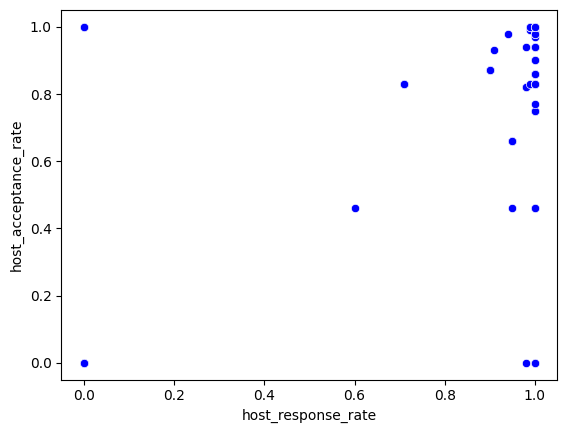

In [344]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro2_mex)

In [345]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indepa= filtro2_mex[['host_response_rate']]
Var_Depa= filtro2_mex['host_acceptance_rate']

In [346]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modela= LinearRegression()

In [347]:
#Verificamos la función relacionada al modelo
type(modela)

sklearn.linear_model._base.LinearRegression

In [348]:
#Ajustamos el modelo con las variables antes declaradas
modela.fit(X=Vars_Indepa, y=Var_Depa)

LinearRegression()

In [349]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modela.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.59254031]),
 'rank_': 1,
 'singular_': array([2.43933223]),
 'intercept_': 0.3207896535817305}

**Modelo matemático: y= 0.59254031x + 0.3207896535817305**

---

In [350]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Detera=modela.score(X=Vars_Indepa, y=Var_Depa)
coef_Detera

0.2764803721758494

In [351]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correla=np.sqrt(coef_Detera)
coef_Correla

0.5258140091095419

## **Regresión b**

X = price

y= host_acceptance_rate

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

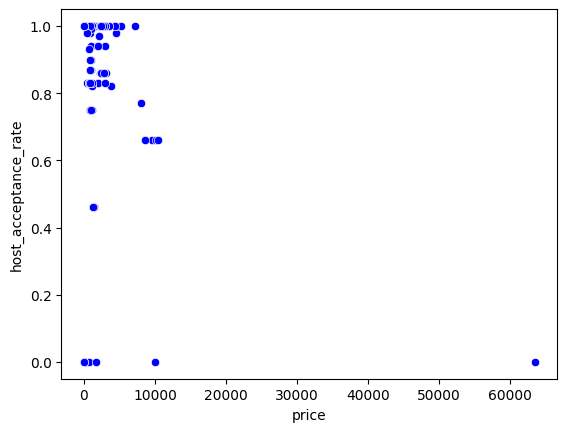

In [352]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=filtro2_mex)

In [353]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indepb= filtro2_mex[['price']]
Var_Depb= filtro2_mex['host_acceptance_rate']

In [354]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelb= LinearRegression()

In [355]:
#Verificamos la función relacionada al modelo
type(modelb)

sklearn.linear_model._base.LinearRegression

In [356]:
#Ajustamos el modelo con las variables antes declaradas
modelb.fit(X=Vars_Indepb, y=Var_Depb)

LinearRegression()

In [357]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modelb.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.47290562e-05]),
 'rank_': 1,
 'singular_': array([65531.08068275]),
 'intercept_': 0.9112905846283037}

**Modelo matemático: y= -1.47290562e-05x + 0.9112905846283037**

---

In [358]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deterb=modelb.score(X=Vars_Indepb, y=Var_Depb)
coef_Deterb

0.12329092094701422

In [359]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correlb=np.sqrt(coef_Deterb)
coef_Correlb

0.351128069152858

## **Regresión c**

X = number_of_reviews

y= host_acceptance_rate

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

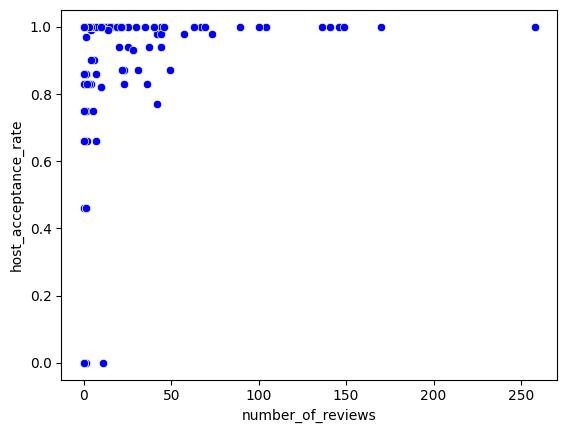

In [360]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro2_mex)

In [361]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indepc= filtro2_mex[['number_of_reviews']]
Var_Depc= filtro2_mex['host_acceptance_rate']

In [362]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelc= LinearRegression()

In [363]:
#Verificamos la función relacionada al modelo
type(modelc)

sklearn.linear_model._base.LinearRegression

In [364]:
#Ajustamos el modelo con las variables antes declaradas
modelc.fit(X=Vars_Indepc, y=Var_Depc)

LinearRegression()

In [365]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modelc.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00132107]),
 'rank_': 1,
 'singular_': array([447.19940417]),
 'intercept_': 0.8466371558698922}

**Modelo matemático: y= 0.00132107x + 0.8466371558698922**


---

In [366]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deterc=modelc.score(X=Vars_Indepc, y=Var_Depc)
coef_Deterc

0.04618901087177962

In [367]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correlc=np.sqrt(coef_Deterc)
coef_Correlc

0.2149162880560234

## **Regresión d**

X = review_scores_cleanliness

y= review_scores_location

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

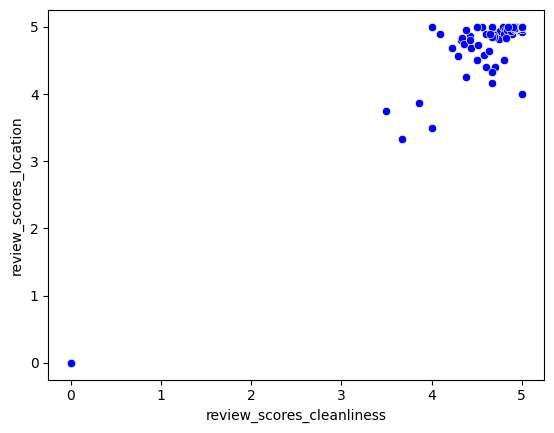

In [368]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=filtro2_mex)

In [369]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indepd= filtro2_mex[['review_scores_cleanliness']]
Var_Depd= filtro2_mex['review_scores_location']

In [370]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modeld= LinearRegression()

In [371]:
#Verificamos la función relacionada al modelo
type(modeld)

sklearn.linear_model._base.LinearRegression

In [372]:
#Ajustamos el modelo con las variables antes declaradas
modeld.fit(X=Vars_Indepd, y=Var_Depd)

LinearRegression()

In [373]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modeld.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.00771463]),
 'rank_': 1,
 'singular_': array([21.92712853]),
 'intercept_': 0.023244773955535702}

**Modelo matemático: y= 1.00771463x + 0.023244773955535702**


---

In [374]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deterd=modeld.score(X=Vars_Indepd, y=Var_Depd)
coef_Deterd

0.9878155685108028

In [375]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correld=np.sqrt(coef_Deterd)
coef_Correld

0.9938891127841187

## **Regresión e**

X = number_of_reviews

y= availability_365

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

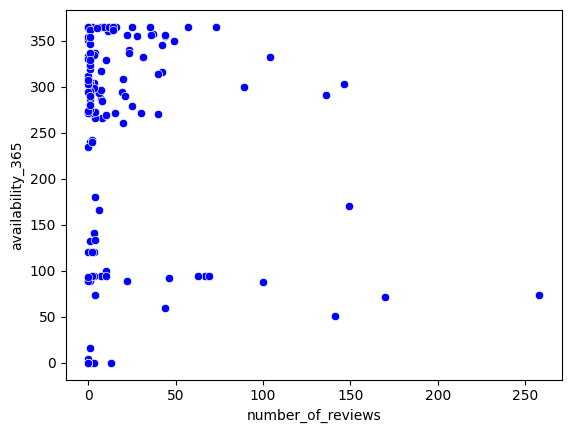

In [376]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=filtro2_mex)

In [377]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indepe= filtro2_mex[['number_of_reviews']]
Var_Depe= filtro2_mex['availability_365']

In [378]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modele= LinearRegression()

In [379]:
#Verificamos la función relacionada al modelo
type(modele)

sklearn.linear_model._base.LinearRegression

In [380]:
#Ajustamos el modelo con las variables antes declaradas
modele.fit(X=Vars_Indepe, y=Var_Depe)

LinearRegression()

In [381]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modele.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.35915992]),
 'rank_': 1,
 'singular_': array([447.19940417]),
 'intercept_': 254.19984142300686}

**Modelo matemático: y= -0.359159929x + 254.19984142300686**


---

In [382]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Detere=modele.score(X=Vars_Indepe, y=Var_Depe)
coef_Detere

0.014844412000572182

In [383]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correle=np.sqrt(coef_Detere)
coef_Correle

0.12183764607284639

## **Regresión f**

X = review_scores_communication

y= reviews_per_month

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

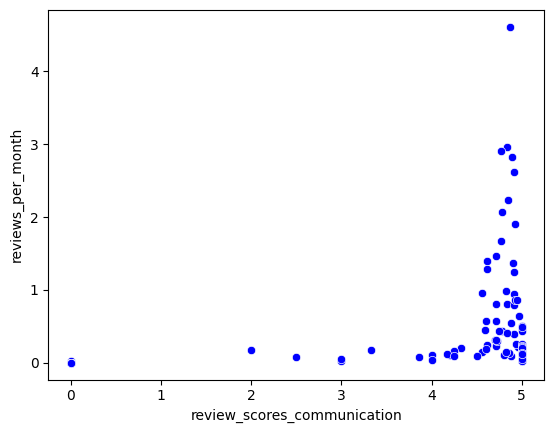

In [384]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=filtro2_mex)

In [385]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indepf= filtro2_mex[['reviews_per_month']]
Var_Depf= filtro2_mex['review_scores_communication']

In [386]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelf= LinearRegression()

In [387]:
#Verificamos la función relacionada al modelo
type(modelf)

sklearn.linear_model._base.LinearRegression

In [388]:
#Ajustamos el modelo con las variables antes declaradas
modelf.fit(X=Vars_Indepf, y=Var_Depf)

LinearRegression()

In [389]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modelf.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.80481694]),
 'rank_': 1,
 'singular_': array([8.22352703]),
 'intercept_': 3.4286557326005256}

**Modelo matemático: y= 0.80481694x + 3.4286557326005256**


---

In [390]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deterf=modelf.score(X=Vars_Indepf, y=Var_Depf)
coef_Deterf

0.08953282465491774

In [391]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correlf=np.sqrt(coef_Deterf)
coef_Correlf

0.29922036136419217

# **Tabla de Coeficientes**

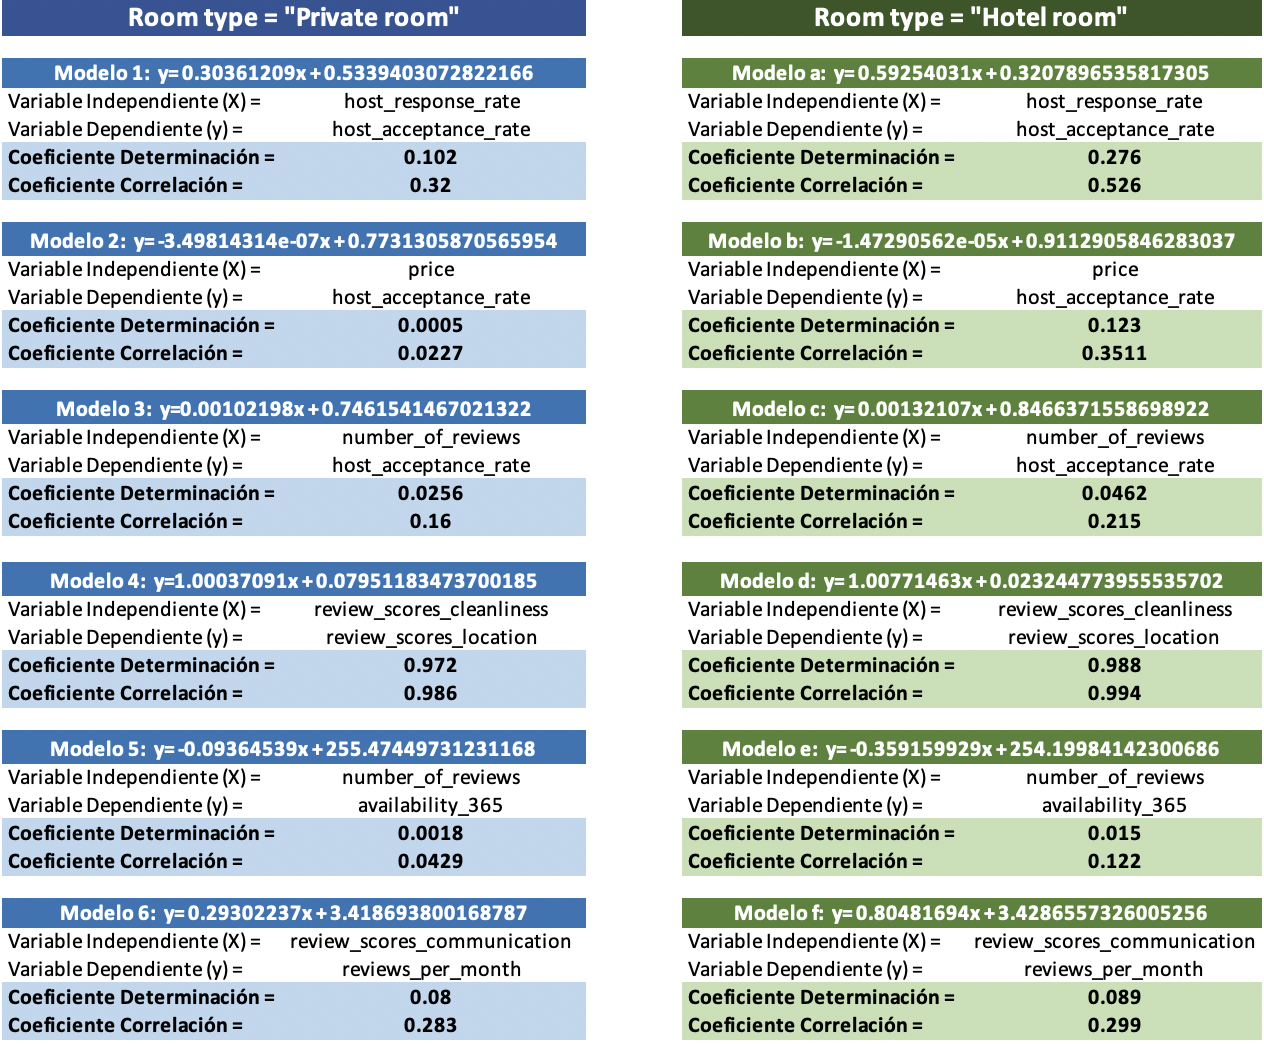